In [68]:
import tweepy
import json
from dotenv import load_dotenv
import os
import numpy as np
import networkx as nx


load_dotenv()
C_KEY = os.getenv('C_KEY')
C_SECRET = os.getenv('C_SECRET')
A_TOKEN_KEY = os.getenv('A_TOKEN_KEY')
A_TOKEN_SECRET = os.getenv('A_TOKEN_SECRET')
auth = tweepy.OAuthHandler(C_KEY, C_SECRET)
auth.set_access_token(A_TOKEN_KEY, A_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [26]:
users = []
tweets = tweepy.Cursor(api.search_tweets, q="politics", result_type="popular", count=100, lang="en", tweet_mode="extended").pages(5)
for page in tweets:
    for entry in page:
        # print(entry.full_text)
        # print(f'AUTHOR: {entry.user.screen_name}')
        # print('-----------------')
        # print(entry.user._json)
        if entry.user._json['followers_count'] > 10000:
            users.append(entry.user._json['screen_name'])
print(len(users))

74


In [69]:
G = nx.DiGraph()
for user in users:
    G.add_node(user)
    followers = api.get_followers(screen_name=user, count=20)
    for follower in followers:
            G.add_edge(follower._json["screen_name"], user)

G.nodes(data=True)

Rate limit reached. Sleeping for: 893
Rate limit reached. Sleeping for: 892
Rate limit reached. Sleeping for: 895
Rate limit reached. Sleeping for: 893


NodeDataView({'CarolineLucas': {}, 'Sisipupa': {}, 'jacobdelsan': {}, 'LynneMa81705174': {}, 'theoriginallaw': {}, 'katbaker230': {}, 'whosaidthatthen': {}, 'Welly_springer': {}, 'criticalvas': {}, '0x_idizer': {}, 'antsidford': {}, 'MazzaBlackwell': {}, 'AlasdairMack66': {}, 'BilalAf28953319': {}, 'Ryeinstein': {}, 'kememe1': {}, 'benmatrouk': {}, 'foroghrahmani85': {}, 'SP0RTSFANDAN': {}, 'Saundy2023': {}, 'jgandiabuleo': {}, 'tribelaw': {}, 'glaspey_dana': {}, 'Steveg1115': {}, 'Shamvita4': {}, 'VegasGu26015264': {}, 'LoriDiGisi': {}, 'Barbara74834689': {}, 'MichaelDFinn1': {}, 'AM62111180': {}, 'HadroJen': {}, 'Nikita108Joynes': {}, 'sharons62813701': {}, 'JeanKolakowski': {}, 'djhepcatnyc': {}, 'inquireofficial': {}, 'tgfromma': {}, '725Stanley': {}, 'tweetznglory': {}, 'NarcyMom': {}, 'XPlugh': {}, 'mVryywVuLqhfY': {}, 'NoLieWithBTC': {}, 'BleueFaerie': {}, 'munkbass': {}, 'Not_the_Chad': {}, 'Mary67743663': {}, 'LydiaLatri': {}, 'Sanasoy1': {}, 'BARKATMED91': {}, 'junicla63': {}

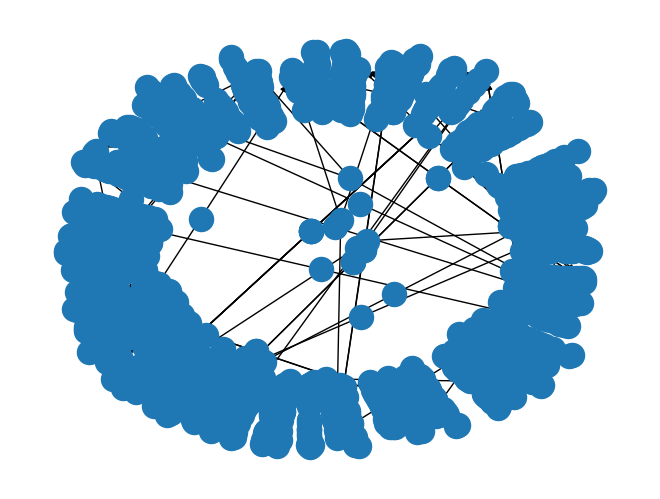

In [108]:

nx.draw(G)


In [118]:
G.number_of_nodes()
G.number_of_edges()

1382

61

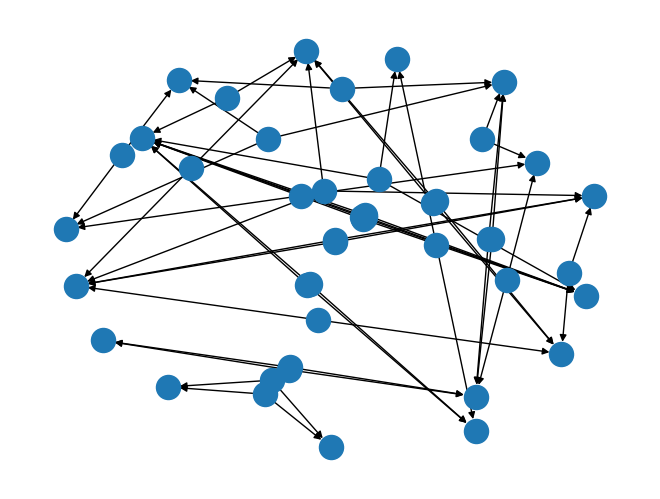

In [122]:
G_tmp = nx.k_core(G, 2)
G_tmp.number_of_nodes()
nx.draw(G_tmp)

# G_tmp.number_of_nodes()
# G_tmp.number_of_edges()

In [91]:
G_tmp.degree()
for predecessor in G_tmp.predecessors("ElieNYC"):
    print(predecessor)

AnixLeslie
Sorry0kEric
otha_bright
5000tball
BobbyMa56063908
whitexmas53
tykev
DSwizzleDude


In [96]:
with open('epic-graph.csv', 'w') as f:
    for edge in G_tmp.edges():
        f.write(f'{edge[0]}\t{edge[1]}\n')



In [98]:
hubs, authorities = nx.hits(G_tmp)
authorities

c:\Python310\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


{'ludwik_zdort': -0.0,
 'covjones': -0.0,
 'Richard98084999': -0.0,
 'SIfill_': 0.28100892569013053,
 'AnixLeslie': -0.0,
 'Sorry0kEric': -0.0,
 'RepMTG': -1.4867256095382165e-17,
 'Terri02350303': -0.0,
 'HackneyAbbott': 7.258674889821536e-18,
 'katbaker230': -0.0,
 'otha_bright': -0.0,
 'Dabzyum': -0.0,
 'CarolineLucas': -2.084958042077689e-17,
 'CNNPolitics': 0.0232312708476454,
 'Teekay0077': -0.0,
 'BillKristol': 0.0746037773916787,
 'RachelReevesMP': -6.127148038968608e-18,
 'SP0RTSFANDAN': -0.0,
 'MonaWagdi3': -0.0,
 'petricevicj': -0.0,
 '5000tball': -0.0,
 'pbleighton001': -0.0,
 'ElieNYC': 0.39874563665467555,
 'AP': 0.07269579353744911,
 'ABC': 0.03249030202029674,
 'nrisercz': -0.0,
 'MONZELLMOORE51': -0.0,
 'AngelaRayner': -1.8369890954461762e-17,
 'BobbyMa56063908': -0.0,
 'JolyonMaugham': 6.3114594062113236e-18,
 'Otto_English': -1.0305814755237025e-17,
 'AnastasioCruzZ1': -0.0,
 'whosaidthatthen': -0.0,
 'ACTBrigitte': -1.4867256095382165e-17,
 'Jessica31284850': -0.0,


In [107]:
G_undirected = G_tmp.to_undirected()
jaccard_info = nx.jaccard_coefficient(G_undirected)
sum = 0
count = 0
zero_count = 0

for u, v, p in jaccard_info:
    sum += p
    count += 1
    if p != 0:
        print(f"Node u: {u}, Node v: {v}, has Jaccard coefficient {p}")
    else:
        zero_count += 1
print(sum/count)
print(zero_count)

Node u: ludwik_zdort, Node v: Teekay0077, has Jaccard coefficient 0.3333333333333333
Node u: ludwik_zdort, Node v: SP0RTSFANDAN, has Jaccard coefficient 0.3333333333333333
Node u: ludwik_zdort, Node v: Ryeinstein, has Jaccard coefficient 0.6666666666666666
Node u: covjones, Node v: Richard98084999, has Jaccard coefficient 0.3333333333333333
Node u: covjones, Node v: katbaker230, has Jaccard coefficient 0.3333333333333333
Node u: covjones, Node v: pbleighton001, has Jaccard coefficient 1.0
Node u: covjones, Node v: antsidford, has Jaccard coefficient 0.3333333333333333
Node u: Richard98084999, Node v: katbaker230, has Jaccard coefficient 0.3333333333333333
Node u: Richard98084999, Node v: Teekay0077, has Jaccard coefficient 0.3333333333333333
Node u: Richard98084999, Node v: pbleighton001, has Jaccard coefficient 0.3333333333333333
Node u: Richard98084999, Node v: whosaidthatthen, has Jaccard coefficient 0.3333333333333333
Node u: Richard98084999, Node v: antsidford, has Jaccard coeffic